1. Create and answer at least 5 unique questions using different types of plots to help you understand the data. You can create additional categorical columns or reshape your data to help you understand the data.

2. Create a test set and a training set using the original dataset. 

3. Follow the steps that we use in Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classifiers that can predict a binary outcome (survive or dead). Use any strategy that you see fit. Use N-fold cross-validation to evaluate the performance of each classifier.

4. Create a ROC plot that shows all the trained ML classifier's performance. Select the best one for testing.

5. Test your best ML classifier using the test set.

6. Create a pre-recorded slideshow presentation video (5-10 min long) in which you explain the following:

how the data visualization help you with choosing certain strategies in developing the ML training pipeline
what strategy is used to create test/train data
what ML models are chosen, and why are they suitable for this analysis
the performance of all trained models (including an image of the ROC curve)
how is the performance of the best ML model using the test set. 
To wrap up, discuss the challenges you have encountered and/or any other thoughts you have about this project. 
7. A url to access the pre-recorded presentation video

Note: For the pre-recorded presentation, you can use any screen recording tools such as Loom (Links to an external site.), OBS Studio (Links to an external site.), or even just Zoom meeting with screen recording. Your recording will need to be uploaded to a cloud platform such as Youtube (unlisted) or Zoom cloud recording will automatically save the video in the cloud. 

8. The presentation slides (in PDF format)

9. All the Python code for Steps 1-5 should be contained in one Jupyter notebook. 

age: age of the patient (years)

anemia: decrease of red blood cells or hemoglobin (boolean)

high blood pressure: if the patient has hypertension (boolean)

creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)

diabetes: if the patient has diabetes (boolean)

ejection fraction: percentage of blood leaving the heart at each contraction (percentage)

platelets: platelets in the blood (kiloplatelets/mL)

sex: woman or man (binary)

serum creatinine: level of serum creatinine in the blood (mg/dL)

serum sodium: level of serum sodium in the blood (mEq/L)

smoking: if the patient smokes or not (boolean)

time: follow-up period (days)

[target] death event: if the patient deceased during the follow-up period (boolean)

#Set Up

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/heart_disease_clinical_data.csv"

df = pd.read_csv(url)
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#Data Exploration

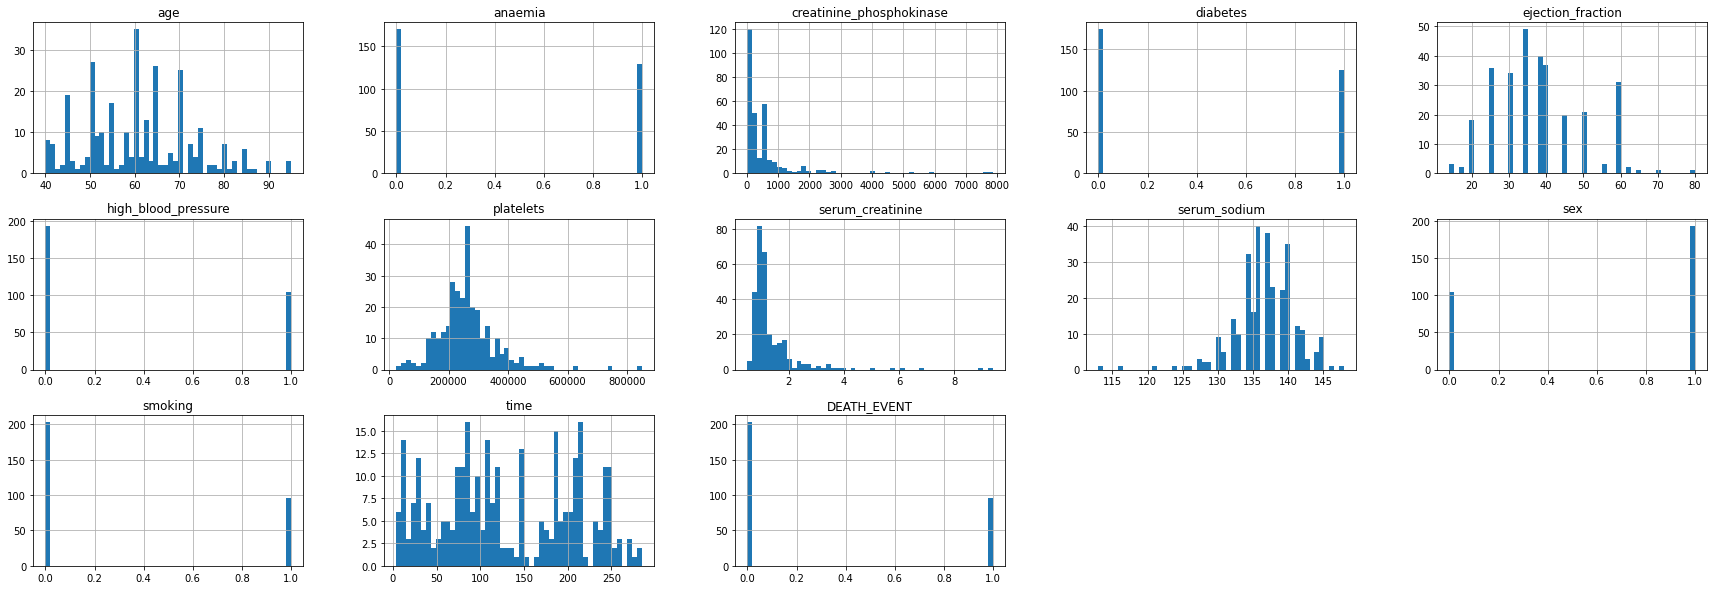

In [ ]:
df.hist(bins= 50,figsize=(30,10), layout = (3,5))
plt.show()

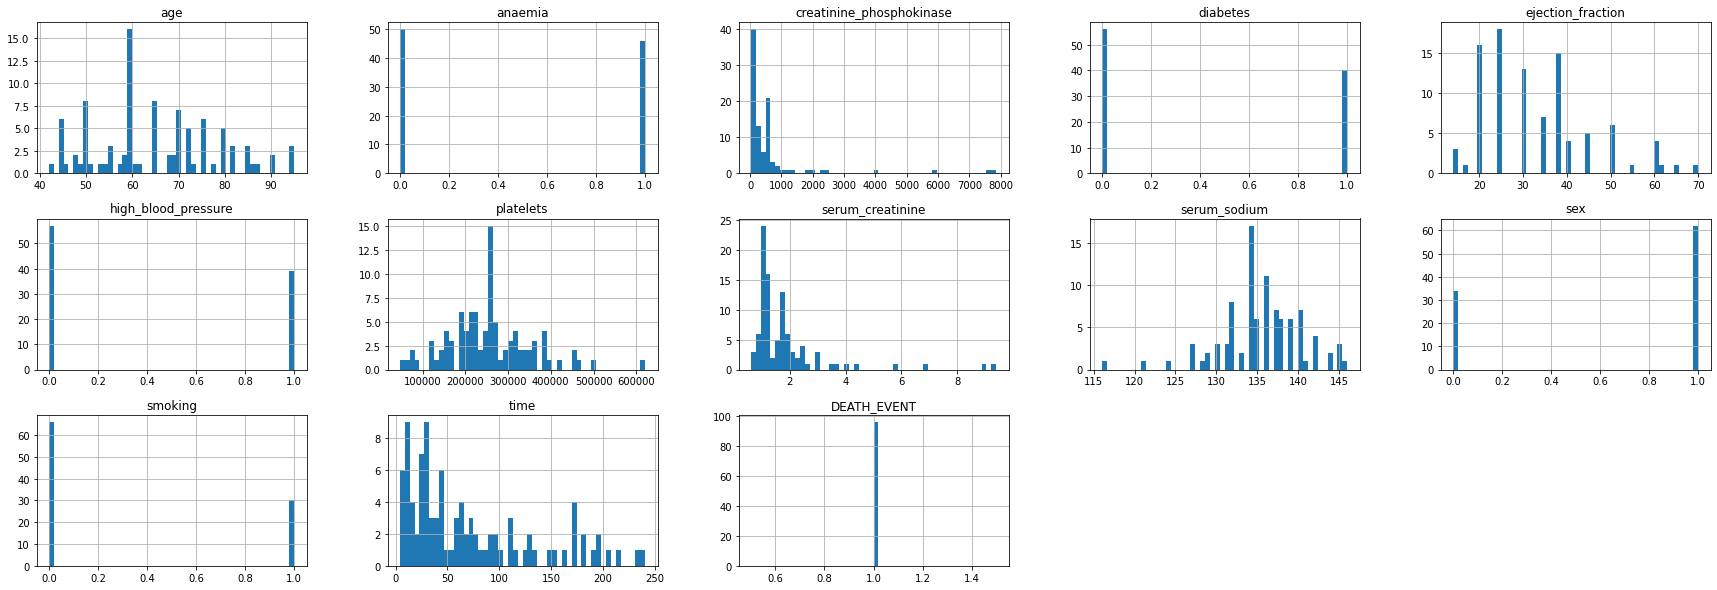

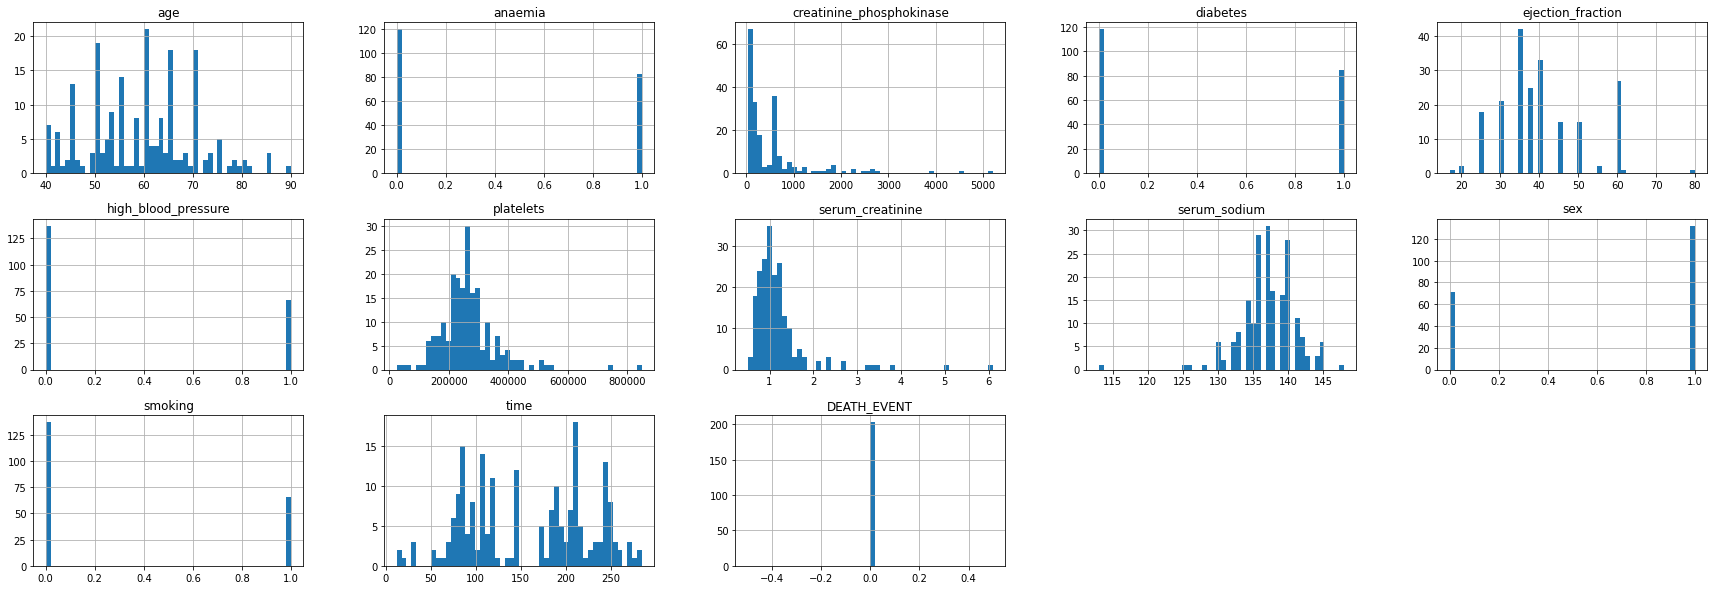

In [ ]:
df[df.DEATH_EVENT == 1].hist(bins=50, figsize=(30,10), layout = (3,5))
df[df.DEATH_EVENT == 0].hist(bins=50, figsize=(30,10), layout = (3,5))

plt.show()

Q2. What is the distribution of platelet count with respect to death event?

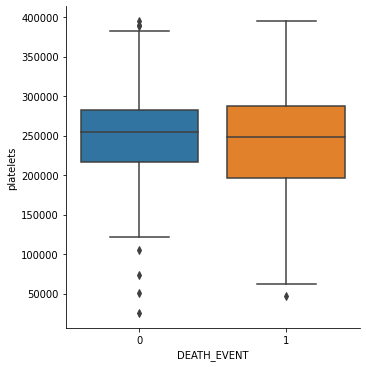

In [ ]:
sns.catplot(
    data=df[df['platelets'] < 400000], 
    y='platelets',
    x='DEATH_EVENT',
    kind='box')

Although the average platelets seem to be the very close with patients who died during follow up period being a little lower, there are more patients with lower platelet count among those who died. The plot below takes a closer look at patients with lower platelet counts and proves the same. 

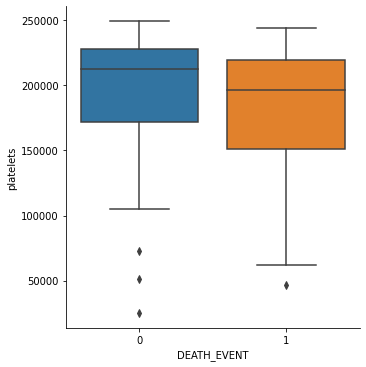

In [ ]:
sns.catplot(
    data=df[df['platelets'] < 250000], 
    y='platelets',
    x='DEATH_EVENT',
    kind='box')

Q1: What is the relationship between platelets and age with respect of death event?

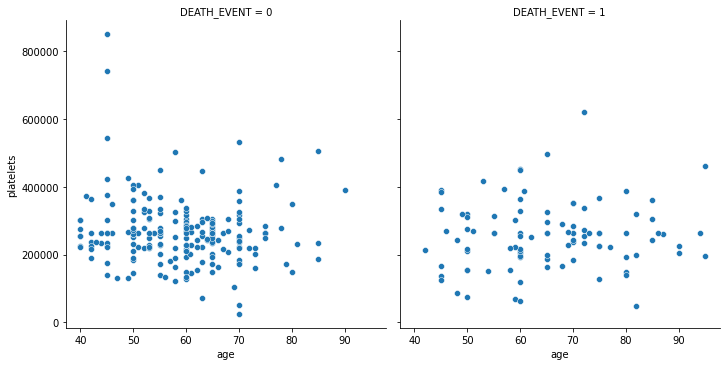

In [ ]:
sns.relplot(data=df, y="platelets", x= "age", col='DEATH_EVENT')

There seems to be no apparent correlation between age and platelet count of patients although there seems to be more data on patients with DEATH_EVENT = 0. ALso, platelets has normal distribution in the histograms above and it's also spread out in this plot so it would be a good column to use for Straitified Shuffling.

Q3. What is the distibution of serum creatinine levels among smokers and non-smokers with respect to sex and death event? 

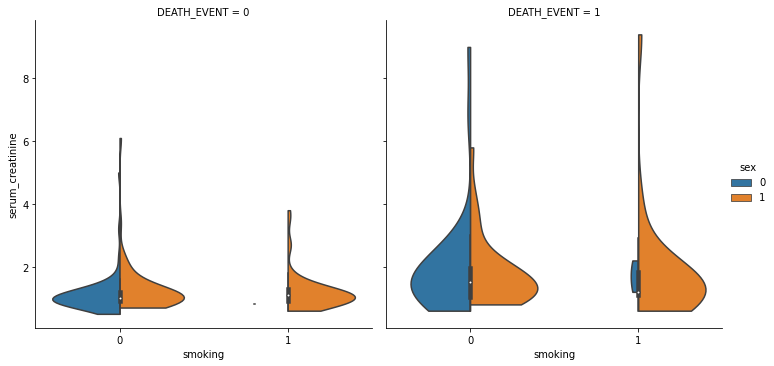

In [ ]:
sns.catplot(
    data=df, 
    y='serum_creatinine',
    x='smoking',
    kind='violin',
    cut= 0,
    hue='sex',
    scale="count",
    split=True,
    col= 'DEATH_EVENT')

There is lot going on these two plots. First, in plot with patients who died, patients serum creatinine levels are apparently higher. Another noticable thing is the difference between male and female distribution. The data has a lot more male smokes compared to female smokers.

Q4. What is relationship between high blood pressure and follow up time period of patients with respect to death event?

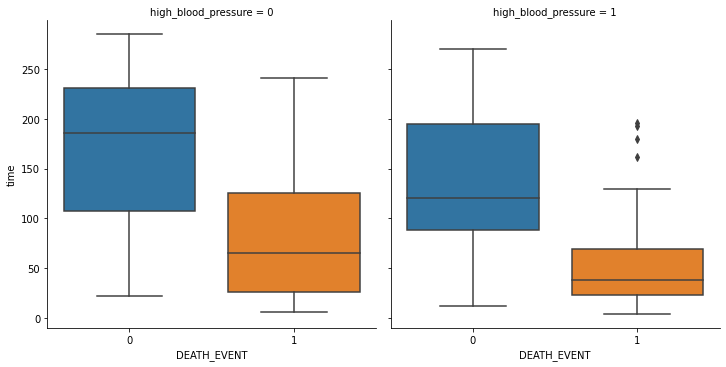

In [ ]:
sns.catplot(data=df,
            y='time',
            x='DEATH_EVENT',
            kind= 'box',
            col= 'high_blood_pressure')

In general, patients with high blood pressure have shorter follow up periods. Also, patients who died have significantly shorter follow up period compared to those who survived.

Q5. 

#Preparing test and train sets

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,time_cat,platelets_cat
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,3
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1,3
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1,3
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,1,2
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,1,3
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1,6
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,1,2


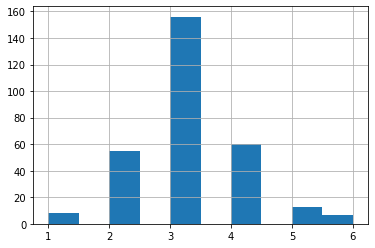

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np


df['platelets_cat'] = pd.cut(df['platelets'], bins= [0, 100000, 200000, 300000, 400000, 500000, np.inf], labels= [1, 2, 3, 4, 5, 6])
df['platelets_cat'].hist()
df

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['platelets_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop('platelets_cat', axis=1, inplace=True)

In [ ]:
df = strat_train_set.drop('DEATH_EVENT', axis=1) # drop labels for training set
df_labels = strat_train_set['DEATH_EVENT'].copy()
df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,time_cat
0,40.0,0,90,0,35,0,255000.0,1.1,136,1,1,212,1
1,90.0,1,60,1,50,0,226000.0,1.0,134,1,0,30,1
2,69.0,0,1419,0,40,0,105000.0,1.0,135,1,1,147,1
3,65.0,0,395,1,25,0,265000.0,1.2,136,1,1,154,1
4,68.0,1,1021,1,35,0,271000.0,1.1,134,1,0,197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,72.0,0,127,1,50,1,218000.0,1.0,134,1,0,33,1
235,42.0,0,64,0,30,0,215000.0,3.8,128,1,1,250,1
236,78.0,0,224,0,50,0,481000.0,1.4,138,1,1,192,1
237,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,1


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),            
    ])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
cat_attribs = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(df))
    ])

df_prepared = full_pipeline.fit_transform(df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clas = DecisionTreeClassifier(random_state=42)
tree_clas.fit(df_prepared, df_labels)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

df_predictions = tree_clas.predict(df_prepared)
tree_as = accuracy_score(df_labels, df_predictions)
tree_as

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clas, df_prepared, df_labels, 
                        scoring="accuracy", cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.79166667 0.79166667 0.75       0.66666667 0.66666667 0.79166667
 0.83333333 0.70833333 0.70833333 0.73913043]
Mean: 0.7447463768115942
Standard deviation: 0.0541812059397412


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clas = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clas.fit(df_prepared, df_labels)
df_predictions = forest_clas.predict(df_prepared)
forest_as = accuracy_score(df_labels, df_predictions)
forest_as

0.99581589958159

In [ ]:
forest_scores = cross_val_score(forest_clas, df_prepared, df_labels,
                                scoring="accuracy", cv=10)
display_scores(forest_scores)

Scores: [0.75       0.83333333 0.79166667 0.875      0.875      0.75
 0.83333333 0.75       0.75       0.7826087 ]
Mean: 0.7990942028985508
Standard deviation: 0.048822043637782565


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, solver= 'liblinear', multi_class = 'ovr', max_iter= 100).fit(df_prepared, df_labels)
log_cv_scores = cross_val_score(log_reg, df_prepared, df_labels, cv=10)
display_scores(log_cv_scores)
log_reg.get_params

Scores: [0.79166667 0.83333333 0.83333333 0.79166667 0.75       0.83333333
 0.875      0.95833333 0.79166667 0.69565217]
Mean: 0.8153985507246377
Standard deviation: 0.06727066691805014


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)>

In [ ]:
from sklearn import svm

SVM = svm.LinearSVC(max_iter= 1000000).fit(df_prepared, df_labels)
svm_scores = cross_val_score(SVM, df_prepared, df_labels, cv= 8)
display_scores(svm_scores)
SVM.get_params

Scores: [0.83333333 0.83333333 0.8        0.76666667 0.83333333 0.9
 0.8        0.79310345]
Mean: 0.8199712643678161
Standard deviation: 0.03758522925720712


<bound method BaseEstimator.get_params of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clas = KNeighborsClassifier(n_neighbors=10)
kn_clas.fit(df_prepared, df_labels)
df_predictions = kn_clas.predict(df_prepared)
kn_as = accuracy_score(df_labels, df_predictions)
kn_as

0.7866108786610879

In [ ]:
kn_scores = cross_val_score(kn_clas, df_prepared, df_labels,
                                scoring="accuracy", cv=10)
display_scores(kn_scores)

Scores: [0.83333333 0.75       0.70833333 0.70833333 0.70833333 0.70833333
 0.79166667 0.75       0.66666667 0.69565217]
Mean: 0.7320652173913043
Standard deviation: 0.047229827834336637


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_clas = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_clas, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', 
                                random_state=42)
rnd_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop('DEATH_EVENT', axis=1)
y_test = strat_test_set['DEATH_EVENT'].copy()
#y_test = ordinal_encoder.fit_transform(pd.DataFrame(y_test))
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_model.score(X_test_prepared, y_test)

0.8333333333333334

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [.01,.1, 1,2,3,4, 5,6,7,8],
    'intercept_scaling' : [.001, .01, .1, 1.0, 5.0, 10, 20]}
  ] 

# clf = LogisticRegression(random_state=0, solver= 'liblinear', max_iter= 100)
# grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)
# grid_search.fit(df_prepared, df_labels)

SVM = svm.LinearSVC(max_iter= 1000000)
grid_search = GridSearchCV(SVM, param_grid, cv=8, scoring='accuracy', return_train_score=True)
grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=8, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8],
                          'intercept_scaling': [0.001, 0.01, 0.1, 1.0, 5.0, 10,
                                                20]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('DEATH_EVENT', axis=1)
y_test = strat_test_set['DEATH_EVENT'].copy()
#y_test = ordinal_encoder.fit_transform(pd.DataFrame(y_test))
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_model.score(X_test_prepared, y_test)

0.8